# Project notebook content

       Our idea is to find the most significant features using various feature selection techniques on each dataset and combine (intersection) the selected features those features to see if the resultant featureset helps in increasing the prediction accuracy on support vector machines.
       We are working with multiple different datasets because we want to observe if the number of features, number of values in a dataset affect the performance of our experiment.
    
    1) Datasets into dataframe
    2) Cleansing
    3) Analysis on data cleansing (visualizations)
        i) Wisconsin (Diagnostic) = dfwd
        ii) Wisconsin (Original) = dfw
        iii) Coimbra = dfwc
    4) Model running without any feature selection & Comparison
        i) Wisconsin (Diagnostic) = dfwd_data, dfwd_result
        ii) Wisconsin (Original) = dfw_data, dfw_result
        iii) Coimbra = dfc_data, dfc_result
    5) Feature Selection
        i) Correlation with p-value
            a) Wisconsin (Diagnostic) = dfwd_corr_selected
            b) Wisconsin (Original) = dfw_corr_selected
            c) Coimbra = dfwc_corr_selected
        ii) RFECV
            a) Wisconsin (Diagnostic) = dfwd_rfecv_selected
            b) Wisconsin (Original) = dfw_rfecv_selected
            c) Coimbra = dfwc_rfecv_selected
        iii) SelectFdr
            a) Wisconsin (Diagnostic) = dfwd_selfdr_selected
            b) Wisconsin (Original) = dfw_selfdr_selected
            c) Coimbra = dfwc_selfdr_selected
    6) Intersection of feature sets of all the methods
        i) Wisconsin (Diagnostic) = dfwd_intersect
        ii) Wisconsin (Original) = dfw_intersect
        iii) Coimbra = dfwc_intersect
    7) Run the same model on the intersections & compare
    8) Future Scope: 
        i) Combine the intersections from all three datasets
        ii) Generate data for the resultant featureset
        iii) Run model and compare the results

In [376]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import statsmodels.formula.api as sm
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFdr, chi2

# Loading Datasets into the project

#### We have considered 3 datasets viz.
    1) Breast Cancer Wisconsin (Diagnostic) Data Set 
    2) Breast Cancer Wisconsin (Original) Data Set 
    3) Breast Cancer Coimbra Data Set 

## a) Breast Cancer Wisconsin (Diagnostic) Data Set

In [920]:
dfwd = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',header=None,names = ["id","diagnosis","radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","concave points_mean","symmetry_mean","fractal_dimension_mean","radius_se","texture_se","perimeter_se","area_se","smoothness_se","compactness_se","concavity_se","concave points_se","symmetry_se","fractal_dimension_se","radius_worst","texture_worst","perimeter_worst","area_worst","smoothness_worst","compactness_worst","concavity_worst","concave points_worst","symmetry_worst","fractal_dimension_worst"])


In [905]:
dfwd.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Label
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant


    Following are the features: it also contains the classifier feature, diagnosis

In [441]:
dfwd.count()

id                         569
diagnosis                  569
radius_mean                569
texture_mean               569
perimeter_mean             569
area_mean                  569
smoothness_mean            569
compactness_mean           569
concavity_mean             569
concave points_mean        569
symmetry_mean              569
fractal_dimension_mean     569
radius_se                  569
texture_se                 569
perimeter_se               569
area_se                    569
smoothness_se              569
compactness_se             569
concavity_se               569
concave points_se          569
symmetry_se                569
fractal_dimension_se       569
radius_worst               569
texture_worst              569
perimeter_worst            569
area_worst                 569
smoothness_worst           569
compactness_worst          569
concavity_worst            569
concave points_worst       569
symmetry_worst             569
fractal_dimension_worst    569
dtype: i

    checking the data classification in the dataset, we can see that positive vs. negative instances in the dataset are 357 vs. 212

Creating a standard Label field as a class label, which will be standard across all the datasets used for the project

In [442]:
dfwd['Label'] = np.where(dfwd['diagnosis']  == 'B', 'benign', 'malignant')

In [443]:
tempDf1 = dfwd[['Label','id']].groupby(['Label']).agg(['count'], axis="columns")
tempDf1.id

,count
Label,
benign,357
malignant,212


    checking if there are any null values

In [444]:
null_columns=dfwd.columns[dfwd.isnull().any()]
print(dfwd[dfwd.isnull().any(axis=1)][null_columns])

Empty DataFrame
Columns: []
Index: []


In [445]:
nans = lambda dfwd : dfwd[dfwd.isnull().any(axis=1)] 

In [907]:
print(nans(dfwd))

Empty DataFrame
Columns: [id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst, Label]
Index: []

[0 rows x 33 columns]


    Following is the data statistics s.t. mean, median, standard deviation, and min/max values

In [449]:
dfwd.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [908]:
null_columns=dfwd.columns[dfwd.isnull().any()]
print(dfwd[dfwd.isnull().any(axis=1)][null_columns])

Empty DataFrame
Columns: []
Index: []


In [451]:
nans = lambda dfwd : dfwd[dfwd.isnull().any(axis=1)]

In [452]:
print(nans(dfwd))

Empty DataFrame
Columns: [id, diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst, Label]
Index: []

[0 rows x 33 columns]


In [453]:
dfwd.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Label
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant


    Down below, we can see pie chart representation of the distribution of the dataset.

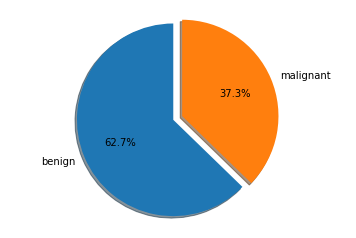

In [454]:
# Plot frequency of cancer

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['benign', 'malignant']
sizes = tempDf1.id['count']
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [455]:
list(tempDf1.id['count'])

[357, 212]

Heatmaps are very useful find out correlation between any two features in the dataset. Here, lighter the shade, more correlated the features are, and vice versa. We will talk more about correlation going forward, as it can help in identifying significant features of a dataset

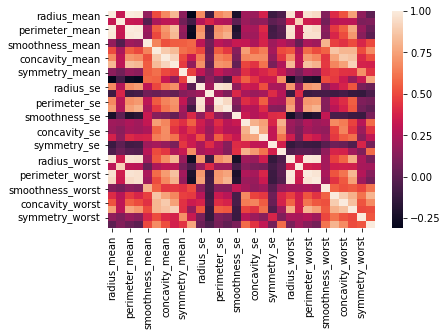

In [456]:
dfwd_corr = dfwd_data.corr()
sns.heatmap(dfwd_corr)

## b) Breast Cancer Wisconsin (Original) Data Set

    The Breast Cancer Wisconsin (Original) dataset contains 10 features and the they classify as: "benign" or "malignant"

In [213]:
dfw = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',header=None,names = ["Sample code number","Clump Thickness","Uniformity of Cell Size","Uniformity of Cell Shape","Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Bland Chromatin","Normal Nucleoli","Mitoses","Class"])

In [214]:
dfw.head(2)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2


Following are the features: it also contains the classifier feature, diagnosis

In [215]:
dfw.count()

Sample code number             699
Clump Thickness                699
Uniformity of Cell Size        699
Uniformity of Cell Shape       699
Marginal Adhesion              699
Single Epithelial Cell Size    699
Bare Nuclei                    699
Bland Chromatin                699
Normal Nucleoli                699
Mitoses                        699
Class                          699
dtype: int64

Distribution of data according to the class label

In [216]:
dfw[['Class','Sample code number']].groupby(['Class']).agg(['count'])

,Sample code number
,count
Class,
2,458
4,241


Creating a standard Label field as a class label, which will be standard across all the datasets used for the project

In [217]:
dfw['Label'] = np.where(dfw['Class']  == 2, 'benign', 'malignant')

In [218]:
dfw.count()

Sample code number             699
Clump Thickness                699
Uniformity of Cell Size        699
Uniformity of Cell Shape       699
Marginal Adhesion              699
Single Epithelial Cell Size    699
Bare Nuclei                    699
Bland Chromatin                699
Normal Nucleoli                699
Mitoses                        699
Class                          699
Label                          699
dtype: int64

Verifying if there are any Nan or Null values in the dataset

In [219]:
print(nans(dfw))

Empty DataFrame
Columns: [Sample code number, Clump Thickness, Uniformity of Cell Size, Uniformity of Cell Shape, Marginal Adhesion, Single Epithelial Cell Size, Bare Nuclei, Bland Chromatin, Normal Nucleoli, Mitoses, Class, Label]
Index: []


We iodentified that though there were no Null values, there was a junk character in the column Bare Nuclei, which needed to be handled for using that variable in prediction

We can figure out that there are 16 such cases where junk value is present in the column

In [220]:
dfw.groupby("Bare Nuclei").count()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Label
Bare Nuclei,,,,,,,,,,,
1,402,402,402,402,402,402,402,402,402,402,402
10,132,132,132,132,132,132,132,132,132,132,132
2,30,30,30,30,30,30,30,30,30,30,30
3,28,28,28,28,28,28,28,28,28,28,28
4,19,19,19,19,19,19,19,19,19,19,19
5,30,30,30,30,30,30,30,30,30,30,30
6,4,4,4,4,4,4,4,4,4,4,4
7,8,8,8,8,8,8,8,8,8,8,8
8,21,21,21,21,21,21,21,21,21,21,21


We are ignoring the junk values in the column to find out the mean of the column to replace the junk values with the mean

In [221]:
dfw.loc[dfw['Bare Nuclei']  != '?'].convert_objects(convert_numeric=True).describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


Once we know the mean, we replace the junk value with the mean value for the column in the dataframe.

In [222]:
dfw['New Bare Nuclei'] = np.where(dfw['Bare Nuclei']  == '?', '3.54', dfw['Bare Nuclei'])

Deleting the old column from the dataframe and replacing it with the new column and then deleting the new column as well to keep consistency in the dataframe

In [223]:
#dfw[["Bare Nuclei","New Bare Nuclei"]]
del dfw['Bare Nuclei']
dfw['Bare Nuclei'] = dfw['New Bare Nuclei'].convert_objects(convert_numeric=True)
del dfw['New Bare Nuclei']

In [224]:
dfw.head(2)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Label,Bare Nuclei
0,1000025,5,1,1,1,2,3,1,1,2,benign,1.0
1,1002945,5,4,4,5,7,3,2,1,2,benign,10.0


Create a summarised dataframe to analyze statistical distribution of the data 

In [225]:
tempDf2 = dfw[['Label','Sample code number']].groupby(['Label']).agg(['count'], axis="columns")

In [226]:
list(tempDf2['Sample code number']['count'])

[458, 241]

    Down below, we can see pie chart representation of the distribution of the dataset.
   
   

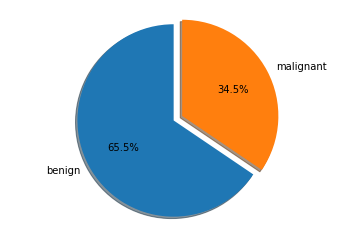

In [227]:
# Plot frequency of cancer

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['benign', 'malignant']
sizes = list(tempDf2['Sample code number']['count'])
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Heatmaps are very useful find out correlation between any two features in the dataset. Here, lighter the shade, more correlated the features are, and vice versa. We will talk more about correlation going forward, as it can help in identifying significant features of a dataset

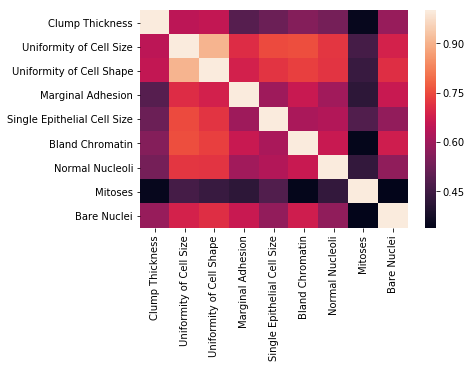

In [244]:
dfw_corr = dfw_data.corr()
sns.heatmap(dfw_corr)

## c) Breast Cancer Coimbra Data Set

In [228]:
dfc = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv')

Following are the features: it also contains the classifier feature, diagnosis

In [229]:
dfc.count()

Age               116
BMI               116
Glucose           116
Insulin           116
HOMA              116
Leptin            116
Adiponectin       116
Resistin          116
MCP.1             116
Classification    116
dtype: int64

Here we are generating the distribution summary against the classification

In [230]:
dfc[['Classification','BMI']].groupby(['Classification']).agg(['count'])

,BMI
,count
Classification,
1,52
2,64


Creating a standard Label field as a class label, which will be standard across all the datasets used for the project

In [231]:
dfc['Label'] = np.where(dfc['Classification']  == 1, 'benign', 'malignant')

In [232]:
print(nans(dfc))

Empty DataFrame
Columns: [Age, BMI, Glucose, Insulin, HOMA, Leptin, Adiponectin, Resistin, MCP.1, Classification, Label]
Index: []


Again we are generating the distribution summary against the classification and storing it into temporary dataframe 

In [233]:
tempDf3 = dfc[['Label','Resistin']].groupby(['Label']).agg(['count'], axis="columns")

In [234]:
list(tempDf3['Resistin']['count'])

[52, 64]

Down below, we can see pie chart representation of the distribution of the dataset.

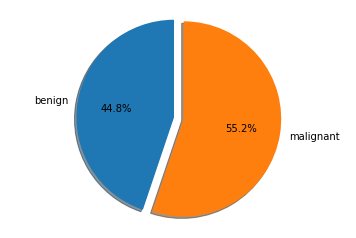

In [235]:
# Plot frequency of cancer

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['benign', 'malignant']
sizes = list(tempDf3['Resistin']['count'])
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Heatmaps are very useful find out correlation between any two features in the dataset. Here, lighter the shade, more correlated the features are, and vice versa. We will talk more about correlation going forward, as it can help in identifying significant features of a dataset

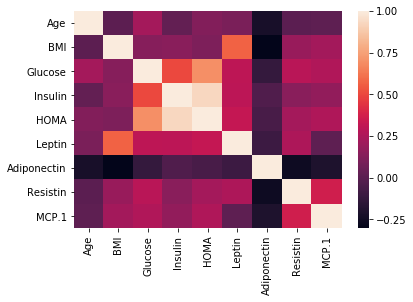

In [245]:
dfc_corr = dfc_data.corr()
sns.heatmap(dfc_corr)

# Comparison without any feature selection 

We are running SVM on all the three datasets with comparison

## a) Breast Cancer Wisconsin (Diagnostic) Data Set

In [457]:
dfwd_result = pd.DataFrame()
dfwd_result['diagnosis'] = dfwd.iloc[:,-1]
dfwd_data = dfwd.iloc[:,2:-1]                         
dfwd_label_encoder = preprocessing.LabelEncoder()              
#dfwd_data.iloc[:,0] = dfwd_label_encoder.fit_transform(dfwd_data.iloc[:,0]).astype('float64')    
#dfwd_x_train, dfwd_x_test, dfwd_y_train, dfwd_y_test = train_test_split(dfwd_data.values, dfwd_result.values, test_size = 0.2)      
dfwd_svc = SVC()
dfwd_svc.fit(dfwd_x_train, dfwd_y_train)
dfwd_prediction = dfwd_svc.predict(dfwd_x_test)
dfwd_cm = confusion_matrix(dfwd_y_test, dfwd_prediction)
dfwd_sum = 0
for i in range(dfwd_cm.shape[0]):
    dfwd_sum += dfwd_cm[i][i]
    
dfwd_accuracy = dfwd_sum/dfwd_x_test.shape[0]                
print(dfwd_accuracy)

0.631578947368421


## b) Breast Cancer Wisconsin (Original) Data Set

In [888]:
dfw_result = pd.DataFrame()
dfw_result['diagnosis'] = dfw.iloc[:,-2]
dfw_data = dfw.iloc[:,[1,2,3,4,5,6,7,8,11]]               
#dfw_x_train, dfw_x_test, dfw_y_train, dfw_y_test = train_test_split(dfw_data.values, dfw_result.values, test_size = 0.2)      
dfw_svc = SVC()
dfw_svc.fit(dfw_x_train, dfw_y_train)
dfw_prediction = dfw_svc.predict(dfw_x_test)
dfw_cm = confusion_matrix(dfw_y_test, dfw_prediction)
dfw_sum = 0
for i in range(dfw_cm.shape[0]):
    dfw_sum += dfw_cm[i][i]
    
dfw_accuracy = dfw_sum/dfw_x_test.shape[0]                
print(dfw_accuracy)

0.95


## c) Breast Cancer Coimbra Data Set

In [241]:
dfc_result = pd.DataFrame()
dfc_result['diagnosis'] = dfc.iloc[:,-1]
dfc_data = dfc.iloc[:,[0,1,2,3,4,5,6,7,8]]               
#dfc_x_train, dfc_x_test, dfc_y_train, dfc_y_test = train_test_split(dfc_data.values, dfc_result.values, test_size = 0.2)      
dfc_svc = SVC()
dfc_svc.fit(dfc_x_train, dfc_y_train)
dfc_prediction = dfc_svc.predict(dfc_x_test)
dfc_cm = confusion_matrix(dfc_y_test, dfc_prediction)
dfc_sum = 0
for i in range(dfc_cm.shape[0]):
    dfc_sum += dfc_cm[i][i]
    
dfc_accuracy = dfc_sum/dfc_x_test.shape[0]                
print(dfc_accuracy)

0.5833333333333334


### Comparing Accuracies for different Dataset

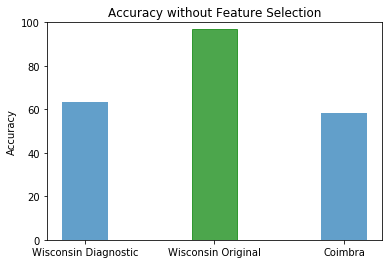

In [242]:
objects = ('Wisconsin Diagnostic', 'Wisconsin Original', 'Coimbra')
y_pos = np.arange(len(objects))
performance = [dfwd_accuracy*100,dfw_accuracy*100,dfc_accuracy*100]
 
barList = plt.bar(y_pos, performance, align='center', alpha=0.7, width = 0.35)
barList[1].set_color('g')
plt.ylim(bottom=0, top=100)
plt.xticks(y_pos, objects)
#plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Accuracy without Feature Selection')
 
plt.show()

# Feature Selection

## 1) Correlation with p-value

Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.

Before we try to understand about about p-value, we need to know about the null hypothesis.

Null hypothesis is a general statement that there is no relationship between two measured phenomena.

Testing (accepting, approving, rejecting, or disproving) the null hypothesis — and thus concluding that there are or are not grounds for believing that there is a relationship between two phenomena (e.g. that a potential treatment has a measurable effect) — is a central task in the modern practice of science; the field of statistics gives precise criteria for rejecting a null hypothesis.

P-value or probability value or asymptotic significance is a probability value for a given statistical model that, if the null hypothesis is true, a set of statistical observations more commonly known as the statistical summary is greater than or equal in magnitude to the observed results.

Removal of different features from the dataset will have different effects on the p-value for the dataset. We can remove different features and measure the p-value in each case. These measured p-values can be used to decide whether to keep a feature or not.

#### p-value function

In [458]:
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

### a) Breast Cancer Wisconsin (Diagnostic) Data Set

#### Dataset operations

In [459]:
dfwd_data;dfwd_result;

In [460]:
dfwd_data.describe();dfwd_result.describe();

#### Correlation

In [461]:
dfwd_corr = dfwd_data.corr()

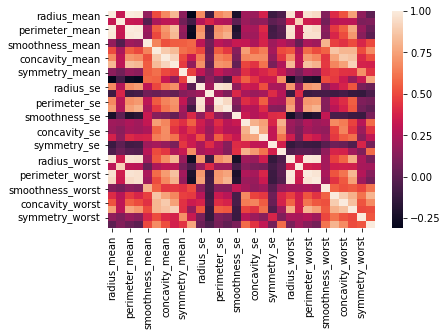

In [462]:
sns.heatmap(dfwd_corr)

we compare the correlation between features and remove one of two features that have a correlation higher than 0.9

In [679]:
dfwd_columns = np.full((dfwd_corr.shape[0],), True, dtype=bool)
for i in range(dfwd_corr.shape[0]):
    for j in range(i+1, dfwd_corr.shape[0]):
        if dfwd_corr.iloc[i,j] >= 0.9:
            if dfwd_columns[j]:
                dfwd_columns[j] = False
dfwd_selected_columns = dfwd_data.columns[dfwd_columns]
dfwd_corr_selected = dfwd_data[dfwd_selected_columns]

In [680]:
dfwd_corr_selected.iloc[:,].shape

(569, 20)

the dataset has only those columns with correlation less than 0.9

In [681]:
label_encoder = LabelEncoder()
dfwd_result.iloc[:,0] = label_encoder.fit_transform(dfwd_result.iloc[:,0]).astype('float64')
dfwd_result;
dfwd_result.iloc[:].values;
len(dfwd_corr_selected.values)

569

we will be selecting the columns based on how they affect the p-value. We are the removing the column diagnosis because it is the column we are trying to predict

In [682]:
SL = 0.05
dfwd_data_modeled, dfwd_selected_columns = backwardElimination(dfwd_corr_selected.values, dfwd_result.values, SL, dfwd_selected_columns)


Moving the result to a new Dataframe

In [683]:
dfwd_corr_selected = pd.DataFrame(data = dfwd_data_modeled, columns = dfwd_selected_columns)

Plotting the data to visualize their distribution

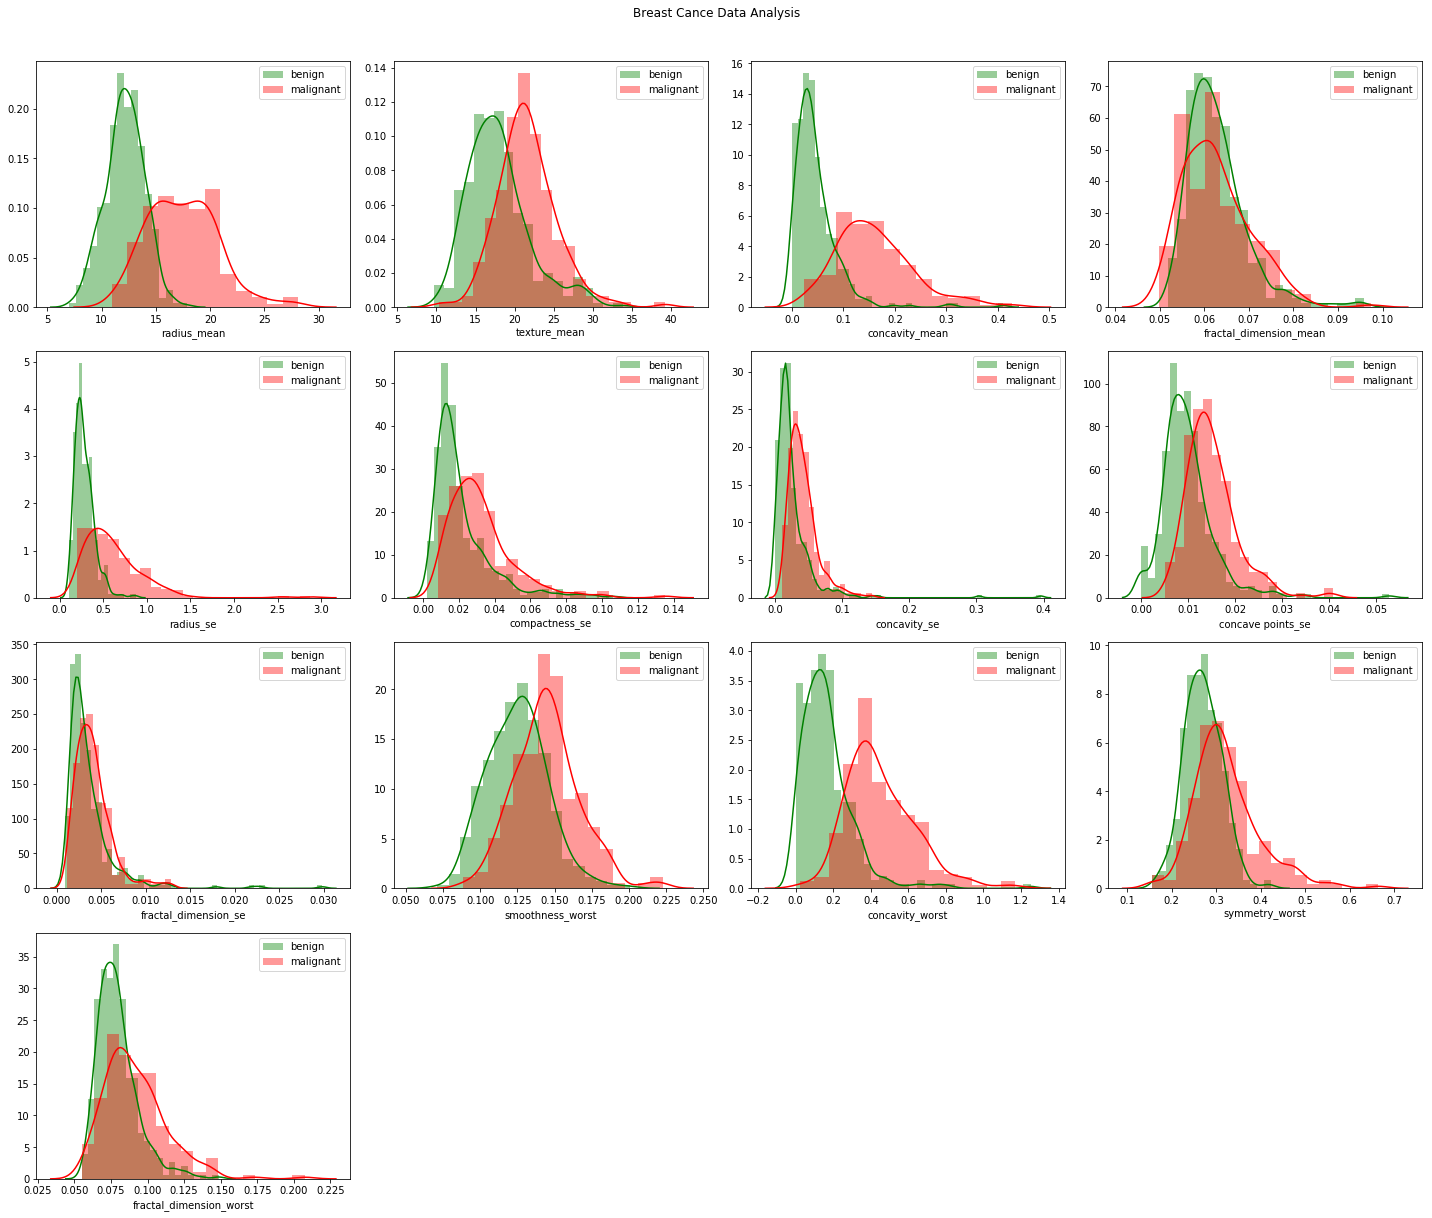

In [684]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in dfwd_corr_selected.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(dfwd_corr_selected[i][dfwd_result['diagnosis']==0], color='g', label = 'benign')
    sns.distplot(dfwd_corr_selected[i][dfwd_result['diagnosis']==1], color='r', label = 'malignant')
    plt.legend(loc='best')
fig.suptitle('Breast Cance Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

Now we split the data to train and test set. 20% of the data is used to create the test data and 80% to create the train data

In [729]:
dfwd_corr_x_train_sel, dfwd_corr_x_test_sel, dfwd_corr_y_train_sel, dfwd_corr_y_test_sel = train_test_split(dfwd_corr_selected.values, dfwd_result.values, test_size = 0.2)


The default kernel used by SVC is the gaussian kernel

We are using a Support Vector Classifier with a Gaussian Kernel to make the predictions. We will train the model on our train data and calculate the accuracy of the model using the test data

In [730]:
svc=SVC() 
svc.fit(dfwd_corr_x_train_sel, dfwd_corr_y_train_sel)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Making the predictions and calculating the accurac

In [731]:
prediction = svc.predict(dfwd_corr_x_test_sel)

We are using a confusion matrix here

In [732]:
cm = confusion_matrix(dfwd_corr_y_test_sel, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/dfwd_corr_x_test_sel.shape[0]
print(accuracy)

0.9385964912280702


### b) Breast Cancer Wisconsin (Original) Data Set

#### Dataset Operation

In [488]:
dfw_data;dfw_result;

In [491]:
dfw_data.describe();dfw_result.describe();

#### Correlation

In [500]:
dfw_corr = dfw_data.corr()

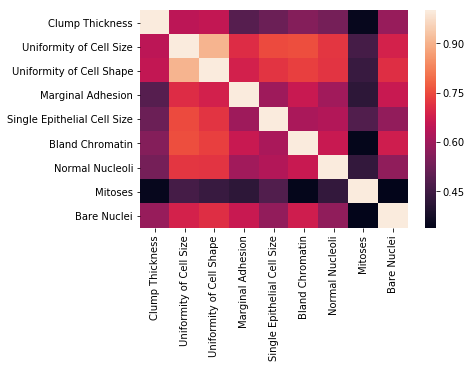

In [501]:
sns.heatmap(dfw_corr)

we compare the correlation between features and remove one of two features that have a correlation higher than 0.9

In [689]:
dfw_columns = np.full((dfw_corr.shape[0],), True, dtype=bool)
for i in range(dfw_corr.shape[0]):
    for j in range(i+1, dfw_corr.shape[0]):
        if dfw_corr.iloc[i,j] >= 0.9:
            if dfw_columns[j]:
                dfw_columns[j] = False
dfw_selected_columns = dfw_data.columns[dfw_columns]
dfw_corr_selected = dfw_data[dfw_selected_columns]

In [690]:
dfw_corr_selected.iloc[:,].shape

(699, 8)

In [691]:
label_encoder = LabelEncoder()
dfw_result.iloc[:,0] = label_encoder.fit_transform(dfw_result.iloc[:,0]).astype('float64')
dfw_result
dfw_result.iloc[:].values;
len(dfw_corr_selected.values)

699

Next we will be selecting the columns based on how they affect the p-value. We are the removing the column diagnosis because it is the column we are trying to predict

In [692]:
SL = 0.05
dfw_data_modeled, dfw_selected_columns = backwardElimination(dfw_corr_selected.values, dfw_result.values, SL, dfw_selected_columns)


Creating a Dataframe with the columns selected using the p-value and correlation

In [693]:
dfw_corr_selected = pd.DataFrame(data = dfw_data_modeled, columns = dfw_selected_columns)

Plotting the data to visualize their distribution

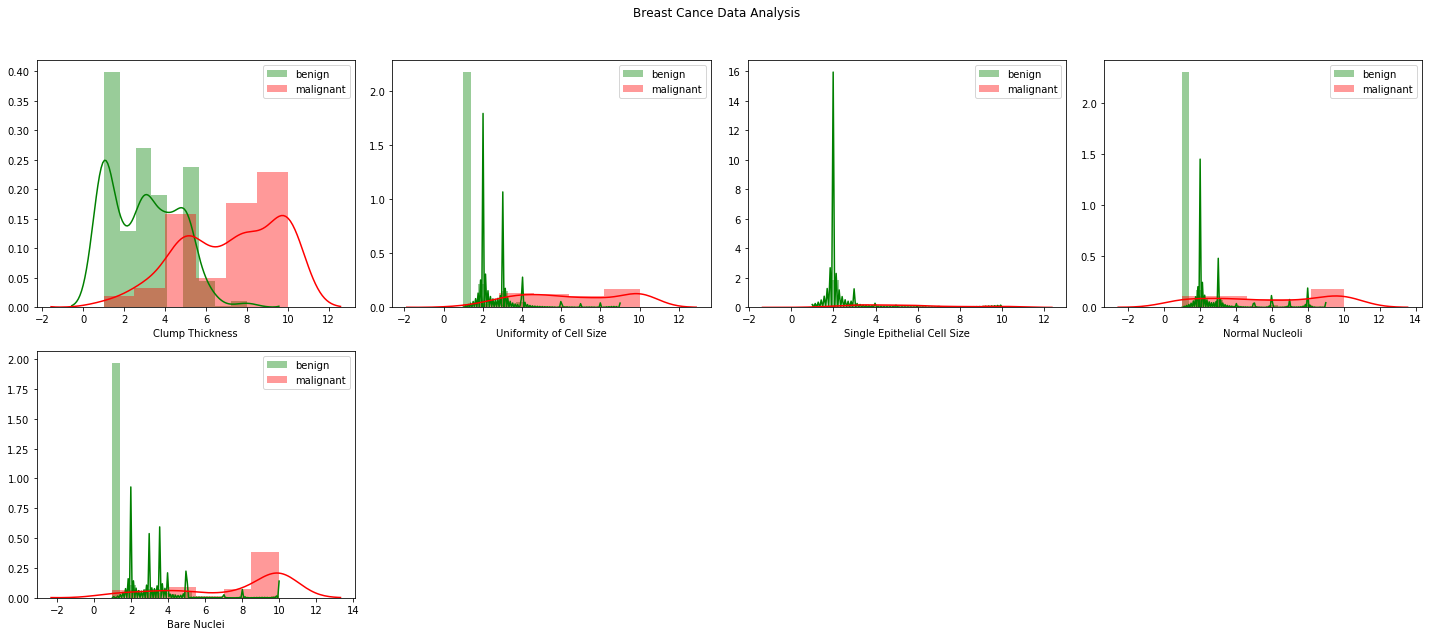

In [694]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in dfw_corr_selected.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(dfw_corr_selected[i][dfw_result['diagnosis']==0], color='g', label = 'benign')
    sns.distplot(dfw_corr_selected[i][dfw_result['diagnosis']==1], color='r', label = 'malignant')
    plt.legend(loc='best')
fig.suptitle('Breast Cance Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

 we split the data to train and test set. 20% of the data is used to create the test data and 80% to create the train data

In [695]:
dfw_x_train_sel, dfw_x_test_sel, dfw_y_train_sel, dfw_y_test_sel = train_test_split(dfw_corr_selected.values, dfw_result.values, test_size = 0.2)

We are using a Support Vector Classifier with a Gaussian Kernel to make the predictions. We will train the model on our train data and calculate the accuracy of the model using the test data

In [696]:
svc=SVC() 
svc.fit(dfw_x_train_sel, dfw_y_train_sel)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Making the predictions and calculating the accuracy

In [697]:
dfw_prediction_sel = svc.predict(dfw_x_test_sel)

We are using a confusion matrix here

In [698]:
cm = confusion_matrix(dfw_y_test_sel, dfw_prediction_sel)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/dfw_x_test_sel.shape[0]
print(accuracy)

0.9571428571428572


### c) Breast Cancer Coimbra Data Set

#### Dataset operation

In [532]:
dfc_data;dfc_result;

In [533]:
dfc_data.describe();dfc_result.describe();

#### Correlation

In [535]:
dfc_corr = dfc_data.corr()

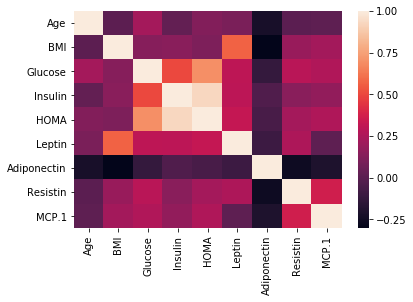

In [536]:
sns.heatmap(dfc_corr)

we compare the correlation between features and remove one of two features that have a correlation higher than 0.9

In [661]:
dfc_columns = np.full((dfc_corr.shape[0],), True, dtype=bool)
for i in range(dfc_corr.shape[0]):
    for j in range(i+1, dfc_corr.shape[0]):
        if dfc_corr.iloc[i,j] >= 0.9:
            if dfc_columns[j]:
                dfc_columns[j] = False
dfc_selected_columns = dfc_data.columns[dfc_columns]
dfc_corr_selected = dfc_data[dfc_selected_columns]

In [662]:
dfc_corr_selected.iloc[:,].shape

(116, 8)

In [663]:
label_encoder = LabelEncoder()
dfc_result.iloc[:,0] = label_encoder.fit_transform(dfc_result.iloc[:,0]).astype('float64')
dfc_result
dfc_result.iloc[:].values;
len(dfc_corr_selected.values)

116

Next we will be selecting the columns based on how they affect the p-value. We are the removing the column diagnosis because it is the column we are trying to predict

In [664]:
SL = 0.05
dfc_data_modeled, dfc_selected_columns = backwardElimination(dfc_corr_selected.values, dfc_result.values, SL, dfc_selected_columns)


Creating a Dataframe with the columns selected using the p-value and correlation


In [665]:
dfc_corr_selected = pd.DataFrame(data = dfc_data_modeled, columns = dfc_selected_columns)


Plotting the data to visualize their distribution

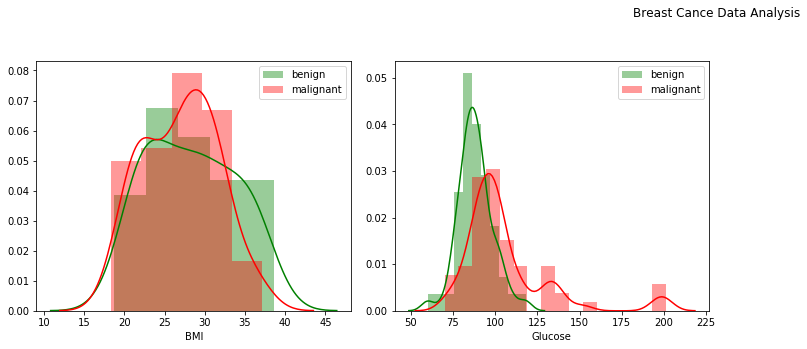

In [666]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in dfc_corr_selected.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(dfc_corr_selected[i][dfc_result['diagnosis']==0], color='g', label = 'benign')
    sns.distplot(dfc_corr_selected[i][dfc_result['diagnosis']==1], color='r', label = 'malignant')
    plt.legend(loc='best')
fig.suptitle('Breast Cance Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

Now we split the data to train and test set. 20% of the data is used to create the test data and 80% to create the train data

In [667]:
dfc_x_train_sel, dfc_x_test_sel, dfc_y_train_sel, dfc_y_test_sel = train_test_split(dfc_corr_selected.values, dfc_result.values, test_size = 0.2)

We are using a Support Vector Classifier with a Gaussian Kernel to make the predictions. We will train the model on our train data and calculate the accuracy of the model using the test data

In [668]:
svc=SVC() 
svc.fit(dfc_x_train_sel, dfc_y_train_sel)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [669]:
prediction = svc.predict(dfc_x_test_sel)

We are using a confusion matrix here

In [670]:
cm = confusion_matrix(dfc_y_test_sel, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/dfc_x_test_sel.shape[0]
print(accuracy)

0.7083333333333334


## 2) Recursive Feature Elimination

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

### a) Breast Cancer Wisconsin (Diagnostic) Data Set

In [58]:
dfwd_data;dfwd_result;

We are using a Support Vector Classifier with a Linear Kernel to make the predictions. We will train the model on our train data and calculate the accuracy of the model using the test data

In [576]:
svc = SVC(kernel="linear")
dfwd_rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2), scoring='accuracy')
dfwd_rfecv.fit(dfwd_data, dfwd_result)

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
   estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

In [577]:
dfwd_rfecv.score(dfwd_data,dfwd_result)

0.961335676625659

Visualize accuracy as a function of number of feature selected

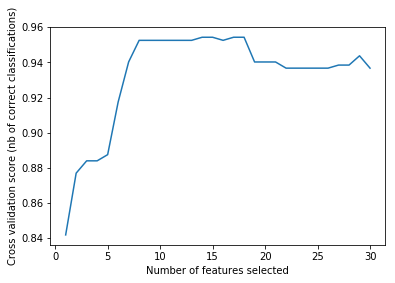

In [578]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(dfwd_rfecv.grid_scores_) + 1), dfwd_rfecv.grid_scores_)
plt.show()

In [579]:
print("Optimal number of features : %d" % dfwd_rfecv.n_features_)

Optimal number of features : 18


In [580]:
dfwd_rfecv.ranking_

array([ 1,  4,  1, 13,  1,  1,  1,  1,  1, 10,  8,  1,  1,  5,  6,  2,  1,
        3, 11,  9,  1,  1,  7, 12,  1,  1,  1,  1,  1,  1])

In [581]:
dfwd_rfecv.support_

array([ True, False,  True, False,  True,  True,  True,  True,  True,
       False, False,  True,  True, False, False, False,  True, False,
       False, False,  True,  True, False, False,  True,  True,  True,
        True,  True,  True])

In [582]:
result_dfwd_selected = dfwd_rfecv.get_support(indices=True)
print(result_dfwd_selected)  # these are the selected indices

[ 0  2  4  5  6  7  8 11 12 16 20 21 24 25 26 27 28 29]


Selected Features list

In [830]:
dfwd_rfecv_selected = dfwd_data.iloc[:,result_dfwd_selected]
dfwd_rfecv_selected.columns

Index(['radius_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean', 'texture_se',
       'perimeter_se', 'concavity_se', 'radius_worst', 'texture_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [724]:
dfwd_rfecv_selected.count()

radius_mean                569
perimeter_mean             569
smoothness_mean            569
compactness_mean           569
concavity_mean             569
concave points_mean        569
symmetry_mean              569
texture_se                 569
perimeter_se               569
concavity_se               569
radius_worst               569
texture_worst              569
smoothness_worst           569
compactness_worst          569
concavity_worst            569
concave points_worst       569
symmetry_worst             569
fractal_dimension_worst    569
dtype: int64

In [725]:
dfwd_rfe_x_train_sel, dfwd_rfe_x_test_sel, dfwd_rfe_y_train_sel, dfwd_rfe_y_test_sel = train_test_split(dfwd_rfecv_selected.values, dfwd_result.values, test_size = 0.2)


We are using a Support Vector Classifier with a Gaussian Kernel to make the predictions. We will train the model on our train data and calculate the accuracy of the model using the test data

In [726]:
svc=SVC() 
svc.fit(dfwd_rfe_x_train_sel, dfwd_rfe_y_train_sel)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [727]:
prediction = svc.predict(dfwd_rfe_x_test_sel)

In [728]:
cm = confusion_matrix(dfwd_rfe_y_test_sel, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/dfwd_rfe_x_test_sel.shape[0]
print(accuracy)

0.9210526315789473


### b) Breast Cancer Wisconsin (Original) Data Set

In [583]:
dfw_data;dfw_result;

We are using a Support Vector Classifier with a Linear Kernel to make the predictions. We will train the model on our train data and calculate the accuracy of the model using the test data

In [584]:
svc = SVC(kernel="linear")
dfw_rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2), scoring='accuracy')
dfw_rfecv.fit(dfw_data, dfw_result)

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
   estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

In [585]:
dfw_rfecv.score(dfw_data,dfw_result)

0.9685264663805436

Visualize accuracy as a function of number of feature selected

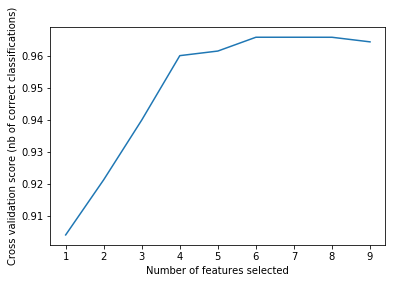

In [586]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(dfw_rfecv.grid_scores_) + 1), dfw_rfecv.grid_scores_)
plt.show()

In [587]:
print("Optimal number of features : %d" % dfw_rfecv.n_features_)

Optimal number of features : 7


In [588]:
dfw_rfecv.ranking_

array([1, 3, 1, 1, 1, 1, 2, 1, 1])

In [589]:
dfw_rfecv.support_

array([ True, False,  True,  True,  True,  True, False,  True,  True])

In [590]:
result_dfw_selected = dfw_rfecv.get_support(indices=True)
print(result_dfw_selected)  # these are the selected indices

[0 2 3 4 5 7 8]


In [733]:
dfw_rfecv_selected = dfw_data.iloc[:,result_dfw_selected]

In [734]:
dfw_rfecv_selected.count()

Clump Thickness                699
Uniformity of Cell Shape       699
Marginal Adhesion              699
Single Epithelial Cell Size    699
Bland Chromatin                699
Mitoses                        699
Bare Nuclei                    699
dtype: int64

In [735]:
dfw_rfe_x_train_sel, dfw_rfe_x_test_sel, dfw_rfe_y_train_sel, dfw_rfe_y_test_sel = train_test_split(dfw_rfecv_selected.values, dfw_result.values, test_size = 0.2)


We are using a Support Vector Classifier with a Gaussian Kernel to make the predictions. We will train the model on our train data and calculate the accuracy of the model using the test data

In [736]:
svc=SVC() 
svc.fit(dfw_rfe_x_train_sel, dfw_rfe_y_train_sel)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [737]:
prediction = svc.predict(dfw_rfe_x_test_sel)

In [738]:
cm = confusion_matrix(dfw_rfe_y_test_sel, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/dfw_rfe_x_test_sel.shape[0]
print(accuracy)

0.9571428571428572


### c) Breast Cancer Coimbra Data Set

In [591]:
dfc_data;dfc_result;

We are using a Support Vector Classifier with a Linear Kernel to make the predictions. We will train the model on our train data and calculate the accuracy of the model using the test data

In [592]:
svc = SVC(kernel="linear")
dfc_rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2), scoring='accuracy')
dfc_rfecv.fit(dfc_data, dfc_result)

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
   estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

In [593]:
dfc_rfecv.score(dfc_data,dfc_result)

0.7672413793103449

Visualize accuracy as a function of number of feature selected

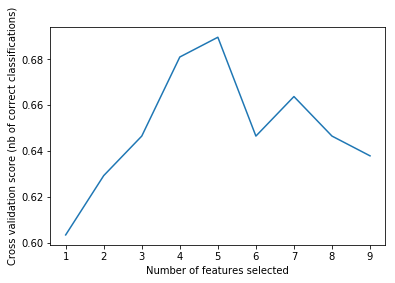

In [594]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(dfc_rfecv.grid_scores_) + 1), dfc_rfecv.grid_scores_)
plt.show()

In [595]:
print("Optimal number of features : %d" % dfc_rfecv.n_features_)

Optimal number of features : 5


In [596]:
dfc_rfecv.ranking_

array([2, 1, 1, 1, 1, 3, 4, 1, 5])

In [597]:
dfc_rfecv.support_

array([False,  True,  True,  True,  True, False, False,  True, False])

In [598]:
result_dfc_selected = dfc_rfecv.get_support(indices=True)
print(result_dfc_selected)  # these are the selected indices

[1 2 3 4 7]


In [739]:
dfc_rfecv_selected = dfc_data.iloc[:,result_dfc_selected]

In [740]:
dfc_rfecv_selected.count()

BMI         116
Glucose     116
Insulin     116
HOMA        116
Resistin    116
dtype: int64

In [745]:
dfc_rfe_x_train_sel, dfc_rfe_x_test_sel, dfc_rfe_y_train_sel, dfc_rfe_y_test_sel = train_test_split(dfc_rfecv_selected.values, dfc_result.values, test_size = 0.2)


We are using a Support Vector Classifier with a Gaussian Kernel to make the predictions. We will train the model on our train data and calculate the accuracy of the model using the test data

In [746]:
svc=SVC() 
svc.fit(dfc_rfe_x_train_sel, dfc_rfe_y_train_sel)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [747]:
prediction = svc.predict(dfc_rfe_x_test_sel)

In [748]:
cm = confusion_matrix(dfc_rfe_y_test_sel, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/dfc_rfe_x_test_sel.shape[0]
print(accuracy)

0.75


## 3) SelectFdr

using common univariate statistical tests for each feature: false positive rate SelectFpr, false discovery rate SelectFdr, or family wise error SelectFwe.

Select the p-values for an estimated false discovery rate

This uses the Benjamini-Hochberg procedure. alpha is an upper bound on the expected false discovery rate.

### a) Breast Cancer Wisconsin (Diagnostic) Data Set

In [628]:
dfwd_data.shape

(569, 30)

In [629]:
dfwd_selectFdr = SelectFdr(chi2, alpha=0.01)
dfwd_selectfdr_result = dfwd_selectFdr.fit_transform(dfwd_data, dfwd_result)
dfwd_selectfdr_result.shape

(569, 16)

In [630]:
dfwd_selectfdr_result;

In [632]:
selectfdr_dfwd_sel = dfwd_selectFdr.get_support(indices = True)
print(selectfdr_dfwd_sel)

[ 0  1  2  3  6  7 10 12 13 20 21 22 23 25 26 27]


In [833]:
dfwd_selfdr_selected = dfwd_data.iloc[:,selectfdr_dfwd_sel]
dfwd_selfdr_selected.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se',
       'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')

In [752]:
dfwd_selfdr_selected.count()

radius_mean             569
texture_mean            569
perimeter_mean          569
area_mean               569
concavity_mean          569
concave points_mean     569
radius_se               569
perimeter_se            569
area_se                 569
radius_worst            569
texture_worst           569
perimeter_worst         569
area_worst              569
compactness_worst       569
concavity_worst         569
concave points_worst    569
dtype: int64

In [889]:
dfwd_selfdr_x_train_sel, dfwd_selfdr_x_test_sel, dfwd_selfdr_y_train_sel, dfwd_selfdr_y_test_sel = train_test_split(dfwd_selfdr_selected.values, dfwd_result.values, test_size = 0.2)


We are using a Support Vector Classifier with a Gaussian Kernel to make the predictions. We will train the model on our train data and calculate the accuracy of the model using the test data

In [890]:
svc=SVC() 
svc.fit(dfwd_selfdr_x_train_sel, dfwd_selfdr_y_train_sel)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [891]:
prediction = svc.predict(dfwd_selfdr_x_test_sel)

In [892]:
cm = confusion_matrix(dfwd_selfdr_y_test_sel, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/dfwd_selfdr_x_test_sel.shape[0]
print(accuracy)

0.6140350877192983


### b) Breast Cancer Wisconsin (Original) Data Set

In [606]:
dfw_data.shape

(699, 9)

In [633]:
dfw_selectFdr = SelectFdr(chi2, alpha=0.01)
dfw_selectfdr_result = dfwd_selectFdr.fit_transform(dfw_data, dfw_result)
dfw_selectfdr_result.shape

(699, 9)

In [634]:
dfw_selectfdr_result;

In [635]:
selectfdr_dfw_sel = dfwd_selectFdr.get_support(indices = True)
print(selectfdr_dfw_sel)

[0 1 2 3 4 5 6 7 8]


In [785]:
dfw_selfdr_selected = dfw_data.iloc[:,selectfdr_dfw_sel]

In [786]:
dfw_selfdr_selected.count()

Clump Thickness                699
Uniformity of Cell Size        699
Uniformity of Cell Shape       699
Marginal Adhesion              699
Single Epithelial Cell Size    699
Bland Chromatin                699
Normal Nucleoli                699
Mitoses                        699
Bare Nuclei                    699
dtype: int64

In [787]:
dfw_selfdr_x_train_sel, dfw_selfdr_x_test_sel, dfw_selfdr_y_train_sel, dfw_selfdr_y_test_sel = train_test_split(dfw_selfdr_selected.values, dfw_result.values, test_size = 0.2)


We are using a Support Vector Classifier with a Gaussian Kernel to make the predictions. We will train the model on our train data and calculate the accuracy of the model using the test data

In [788]:
svc=SVC() 
svc.fit(dfw_selfdr_x_train_sel, dfw_selfdr_y_train_sel)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [789]:
prediction = svc.predict(dfw_selfdr_x_test_sel)

In [790]:
cm = confusion_matrix(dfw_selfdr_y_test_sel, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/dfw_selfdr_x_test_sel.shape[0]
print(accuracy)

0.9571428571428572


### c) Breast Cancer Coimbra Data Set

In [640]:
dfc_data.shape

(116, 9)

In [648]:
dfc_selectFdr = SelectFdr(chi2, alpha=0.01)
dfc_selectfdr_result = dfc_selectFdr.fit_transform(dfc_data, dfc_result)
dfc_selectfdr_result.shape

(116, 5)

In [649]:
dfc_selectfdr_result;

In [650]:
selectfdr_dfc_sel = dfc_selectFdr.get_support(indices = True)
print(selectfdr_dfc_sel)

[2 3 4 7 8]


In [793]:
dfc_selfdr_selected = dfc_data.iloc[:,selectfdr_dfc_sel]

In [794]:
dfw_selfdr_selected.count()

Clump Thickness                699
Uniformity of Cell Size        699
Uniformity of Cell Shape       699
Marginal Adhesion              699
Single Epithelial Cell Size    699
Bland Chromatin                699
Normal Nucleoli                699
Mitoses                        699
Bare Nuclei                    699
dtype: int64

In [901]:
dfc_selfdr_x_train_sel, dfc_selfdr_x_test_sel, dfc_selfdr_y_train_sel, dfc_selfdr_y_test_sel = train_test_split(dfc_selfdr_selected.values, dfc_result.values, test_size = 0.2)


We are using a Support Vector Classifier with a Gaussian Kernel to make the predictions. We will train the model on our train data and calculate the accuracy of the model using the test data

In [902]:
svc=SVC() 
svc.fit(dfc_selfdr_x_train_sel, dfc_selfdr_y_train_sel)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [903]:
prediction = svc.predict(dfc_selfdr_x_test_sel)

In [904]:
cm = confusion_matrix(dfc_selfdr_y_test_sel, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/dfc_selfdr_x_test_sel.shape[0]
print(accuracy)

0.6666666666666666


# Intersection of feature sets of all the methods 

## a) Breast Cancer Wisconsin (Diagnostic) Data Set

In [831]:
dfwd_selected_columns

Index(['radius_mean', 'texture_mean', 'concavity_mean',
       'fractal_dimension_mean', 'radius_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'fractal_dimension_se', 'smoothness_worst',
       'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [832]:
dfwd_rfecv_selected.columns

Index(['radius_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean', 'texture_se',
       'perimeter_se', 'concavity_se', 'radius_worst', 'texture_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [834]:
dfwd_selfdr_selected.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se',
       'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')

In [849]:
list1 = list(set(dfwd_selected_columns) & set(dfwd_rfecv_selected.columns) & set(dfwd_selfdr_selected.columns))

In [850]:
dfwd_intersection = dfwd_data[list1]

In [851]:
dfwd_intersection.head(2)

,concavity_mean,radius_mean,concavity_worst
0,0.3001,17.99,0.7119
1,0.0869,20.57,0.2416


In [852]:
dfwd_intersect_x_train_sel, dfwd_intersect_x_test_sel, dfwd_intersect_y_train_sel, dfwd_intersect_y_test_sel = train_test_split(dfwd_intersection.values, dfwd_result.values, test_size = 0.2)


We are using a Support Vector Classifier with a Gaussian Kernel to make the predictions. We will train the model on our train data and calculate the accuracy of the model using the test data

In [846]:
svc=SVC() 
svc.fit(dfwd_intersect_x_train_sel, dfwd_intersect_y_train_sel)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [847]:
prediction = svc.predict(dfwd_intersect_x_test_sel)

In [848]:
cm = confusion_matrix(dfwd_intersect_y_test_sel, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/dfwd_intersect_x_test_sel.shape[0]
print(accuracy)

0.8771929824561403


## b) Breast Cancer Wisconsin (Original) Data Set

In [ ]:
dfw_selected_columns

In [ ]:
dfw_rfecv_selected.columns

In [ ]:
dfw_selfdr_selected.columns

In [853]:
list2 = list(set(dfw_selected_columns) & set(dfw_rfecv_selected.columns) & set(dfw_selfdr_selected.columns))
list2

['Bare Nuclei', 'Single Epithelial Cell Size', 'Clump Thickness']

In [855]:
dfw_intersection = dfw_data[list2]

In [862]:
dfw_intersection.head(2)

,Bare Nuclei,Single Epithelial Cell Size,Clump Thickness
0,1.0,2,5
1,10.0,7,5


In [857]:
dfw_intersect_x_train_sel, dfw_intersect_x_test_sel, dfw_intersect_y_train_sel, dfw_intersect_y_test_sel = train_test_split(dfw_intersection.values, dfw_result.values, test_size = 0.2)


We are using a Support Vector Classifier with a Gaussian Kernel to make the predictions. We will train the model on our train data and calculate the accuracy of the model using the test data

In [858]:
svc=SVC() 
svc.fit(dfw_intersect_x_train_sel, dfw_intersect_y_train_sel)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [859]:
dfw_prediction = svc.predict(dfw_intersect_x_test_sel)

In [861]:
cm = confusion_matrix(dfw_intersect_y_test_sel, dfw_prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/dfw_intersect_x_test_sel.shape[0]
print(accuracy)

0.95


## c) Breast Cancer Coimbra Data Set

In [863]:
dfc_selected_columns

Index(['BMI', 'Glucose'], dtype='object')

In [864]:
dfc_rfecv_selected.columns

Index(['BMI', 'Glucose', 'Insulin', 'HOMA', 'Resistin'], dtype='object')

In [865]:
dfc_selfdr_selected.columns

Index(['Glucose', 'Insulin', 'HOMA', 'Resistin', 'MCP.1'], dtype='object')

In [909]:
list3 = list(set(dfc_selected_columns) & set(dfc_rfecv_selected.columns) & set(dfc_selfdr_selected.columns))
list3

['Glucose']

In [910]:
dfc_intersection = dfc_data[list3]

In [911]:
dfc_intersection.head(2)

,Glucose
0,70
1,92


In [916]:
dfc_intersect_x_train_sel, dfc_intersect_x_test_sel, dfc_intersect_y_train_sel, dfc_intersect_y_test_sel = train_test_split(dfc_intersection.values, dfc_result.values, test_size = 0.2)


We are using a Support Vector Classifier with a Gaussian Kernel to make the predictions. We will train the model on our train data and calculate the accuracy of the model using the test data

In [917]:
svc=SVC() 
svc.fit(dfc_intersect_x_train_sel, dfc_intersect_y_train_sel)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [918]:
dfc_prediction = svc.predict(dfc_intersect_x_test_sel)

In [919]:
cm = confusion_matrix(dfc_intersect_y_test_sel, dfc_prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/dfc_intersect_x_test_sel.shape[0]
print(accuracy)

0.7083333333333334
